In [55]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

from keras.models import Sequential
from keras.layers import Dense

dataset=pd.read_csv("/content/merc.csv")
dataset.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [56]:
dataset.info()
#Verisetinin tamamı ile ilgili bilgiler

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         13119 non-null  object 
 1   year          13119 non-null  int64  
 2   price         13119 non-null  int64  
 3   transmission  13119 non-null  object 
 4   mileage       13119 non-null  int64  
 5   fuelType      13119 non-null  object 
 6   tax           13119 non-null  int64  
 7   mpg           13119 non-null  float64
 8   engineSize    13119 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 922.6+ KB


In [57]:
dataset.corr()          #her değer arasındaki ilişki (korelasyon) oranı

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


In [ ]:
#- ler ters ilişkiyi ifade ediyor. Örneğin yıl arttıkça mileage azalıyor.  + değerler eş zamanlı arttığını ya da azaldığını gösteriyor. yine yıl arttıkça fiyatta artıyor gibi

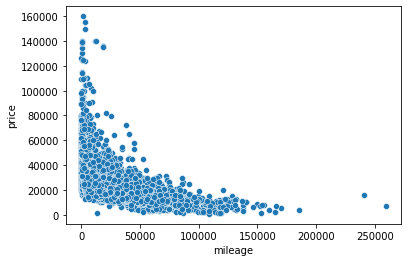

In [58]:
sbn.scatterplot(x="mileage",y="price",data=dataset)

In [ ]:
#Tabloda da görüldüğü üzere yaklaşık 160000 üzeri fiyatlar sayılabiliecek kadar az ve bunlar bizim işlem yaparken sapmamıza neden olacak

In [59]:
dataset.sort_values("price",ascending=False).head(20)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
6199,G Class,2020,159999,Semi-Auto,1350,Petrol,145,21.4,4.0
10044,G Class,2020,154998,Automatic,3000,Petrol,150,21.4,4.0
5,SL CLASS,2011,149948,Automatic,3000,Petrol,570,21.4,6.2
8737,A Class,2019,140319,Semi-Auto,785,Petrol,150,22.1,4.0
6386,G Class,2018,139995,Semi-Auto,13046,Petrol,145,21.4,4.0
8,G Class,2019,139948,Automatic,12000,Petrol,145,21.4,4.0
9133,A Class,2019,139559,Semi-Auto,1000,Petrol,145,22.1,4.0
8821,A Class,2020,138439,Semi-Auto,1000,Petrol,145,22.1,4.0
5902,G Class,2018,135771,Semi-Auto,19000,Petrol,145,21.4,4.0
7864,G Class,2018,135124,Semi-Auto,18234,Petrol,150,21.4,4.0


In [60]:
doksandokuz=dataset.sort_values("price",ascending=False).iloc[131:]
doksandokuz.describe()

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


<Figure size 576x864 with 0 Axes>

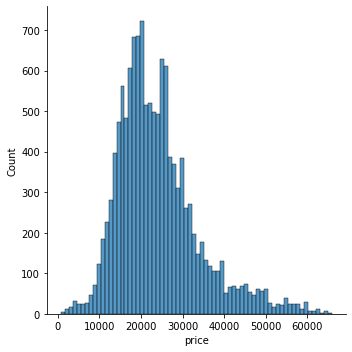

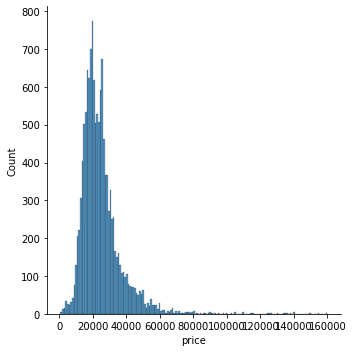

In [61]:
plt.figure(figsize=(8,12),facecolor="w",edgecolor="w")
sbn.displot(doksandokuz["price"])
sbn.displot(dataset["price"])

In [62]:
dataset.groupby("year").mean()["price"]

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

In [63]:
dataset[dataset.year!=1970].groupby("year").mean()["price"]

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

In [64]:
dataset=doksandokuz
dataset=dataset[dataset.year!=1970]
dataset

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
6177,GLS Class,2019,65990,Semi-Auto,5076,Diesel,150,30.4,3.0
5779,C Class,2020,65990,Semi-Auto,999,Petrol,145,28.0,4.0
3191,C Class,2020,65980,Semi-Auto,3999,Petrol,145,28.0,4.0
4727,C Class,2019,65000,Semi-Auto,3398,Petrol,145,27.2,4.0
8814,S Class,2019,64999,Semi-Auto,119,Petrol,145,40.9,3.0
...,...,...,...,...,...,...,...,...,...
11549,C Class,2002,1495,Automatic,13800,Diesel,305,39.8,2.7
12594,C Class,2004,1495,Manual,119000,Petrol,300,34.5,1.8
11765,SLK,2000,1490,Automatic,87000,Petrol,265,27.2,3.2
12008,A Class,2010,1350,Manual,116126,Diesel,145,54.3,2.0


In [65]:
dataset=dataset.drop(["transmission","fuelType","model"],axis=1)
dataset

,year,price,mileage,tax,mpg,engineSize
6177,2019,65990,5076,150,30.4,3.0
5779,2020,65990,999,145,28.0,4.0
3191,2020,65980,3999,145,28.0,4.0
4727,2019,65000,3398,145,27.2,4.0
8814,2019,64999,119,145,40.9,3.0
...,...,...,...,...,...,...
11549,2002,1495,13800,305,39.8,2.7
12594,2004,1495,119000,300,34.5,1.8
11765,2000,1490,87000,265,27.2,3.2
12008,2010,1350,116126,145,54.3,2.0


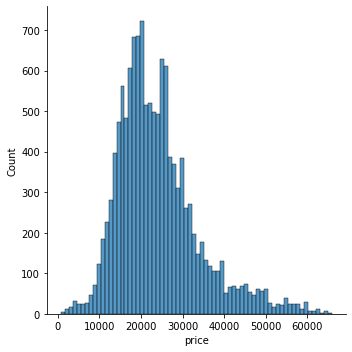

In [66]:
sbn.displot(dataset["price"])

In [67]:
y=dataset["price"].values
x=dataset.drop("price",axis=1).values

In [32]:
x

array([[2.01900e+03, 5.07600e+03, 1.50000e+02, 3.04000e+01, 3.00000e+00],
       [2.02000e+03, 9.99000e+02, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       [2.02000e+03, 3.99900e+03, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       ...,
       [2.00000e+03, 8.70000e+04, 2.65000e+02, 2.72000e+01, 3.20000e+00],
       [2.01000e+03, 1.16126e+05, 1.45000e+02, 5.43000e+01, 2.00000e+00],
       [2.00300e+03, 1.09090e+05, 2.35000e+02, 4.00000e+01, 1.40000e+00]])

In [33]:
y

array([65990, 65990, 65980, ...,  1490,  1350,   650])

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [71]:
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [72]:
model=Sequential()

model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))

model.add(Dense(1))

model.compile(optimizer="adam",loss="mse")

In [73]:
model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),batch_size=250,epochs=300)

Epoch 1/300
37/37 [==============================] - 1s 6ms/step - loss: 667857928.4211 - val_loss: 688111232.0000
Epoch 2/300
37/37 [==============================] - 0s 2ms/step - loss: 670191208.4211 - val_loss: 688097984.0000
Epoch 3/300
37/37 [==============================] - 0s 3ms/step - loss: 670197306.9474 - val_loss: 688061824.0000
Epoch 4/300
37/37 [==============================] - 0s 3ms/step - loss: 670434836.2105 - val_loss: 687971520.0000
Epoch 5/300
37/37 [==============================] - 0s 3ms/step - loss: 666008289.6842 - val_loss: 687756224.0000
Epoch 6/300
37/37 [==============================] - 0s 3ms/step - loss: 670635066.9474 - val_loss: 687290496.0000
Epoch 7/300
37/37 [==============================] - 0s 3ms/step - loss: 668641337.2632 - val_loss: 686344000.0000
Epoch 8/300
37/37 [==============================] - 0s 3ms/step - loss: 670480299.7895 - val_loss: 684587200.0000
Epoch 9/300
37/37 [==============================] - 0s 3ms/step - loss: 6722893

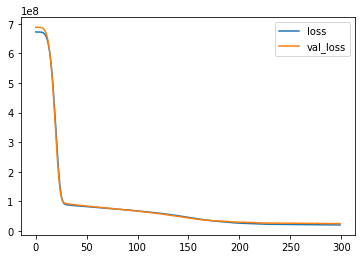

In [74]:
kayipVerisi=pd.DataFrame(model.history.history)
kayipVerisi
kayipVerisi.plot()

#Bu ford'un veri setinde ezbere girmişti burada bi sorun yok 

In [75]:
tahminDizisi=model.predict(x_test)
tahminDizisi

array([[21417.062 ],
       [23145.107 ],
       [24011.857 ],
       ...,
       [24961.86  ],
       [ 6709.7485],
       [23972.82  ]], dtype=float32)

In [76]:
mean_absolute_error(y_test,tahminDizisi)

3515.155237371221

In [77]:
dataset.describe()
#ilk denememde ortalama fiyat 24 bin iken benim sapma miktarım 3500 dolar model iyileştirilse daha iyi olur ama şu an devam edelim

,year,price,mileage,tax,mpg,engineSize
count,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000
mean,2017.285516,24074.855779,22133.367367,129.676215,55.438392,2.051059
std,2.189633,9866.601115,21197.472376,65.167429,15.025902,0.532313
min,1997.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17355.000000,6320.000000,125.000000,45.600000,1.700000
50%,2018.000000,22299.000000,15371.000000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31986.500000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


year           2019.0
price         63099.0
mileage        1766.0
tax             145.0
mpg              48.7
engineSize        3.0
Name: 8285, dtype: float64

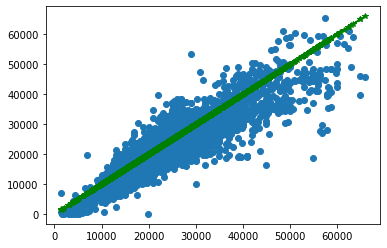

In [82]:
plt.scatter(y_test,tahminDizisi)
plt.plot(y_test,y_test,"g-*")       #y_test lerdewn ne kadar sapmışlar grafikte görelim
dataset.iloc[15]

In [83]:
yeniAraba=dataset.drop("price",axis=1).iloc[15]
yeniAraba

year          2019.0
mileage       1766.0
tax            145.0
mpg             48.7
engineSize       3.0
Name: 8285, dtype: float64

In [84]:
yeniAraba=scaler.transform(yeniAraba.values.reshape(-1,5))
model.predict(yeniAraba)

array([[42715.6]], dtype=float32)

In [ ]:
"""arabanın fiyatı 63 bin iken bu modelle
42 bin civarında buldum. Bu büyük bi soruna neden olabilir.
Onun için modeli iyileştimem gerekmektedir.
"""